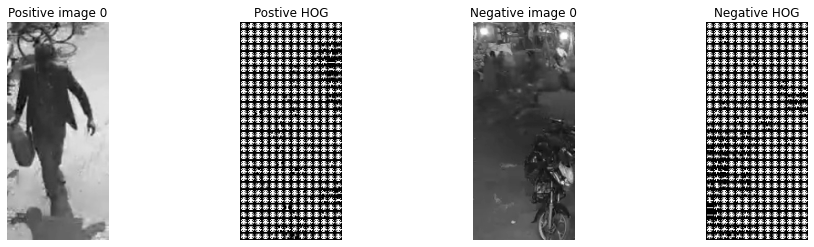

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from skimage import color, data, exposure
from skimage.feature import hog
# from sklearn import svm
# from sklearn.metrics import classification_report,accuracy_score
import os
import cv2

pos_path = "data/dataset/data-pos"
neg_path = "data/dataset/data-neg"

curr_path = os.getcwd()
pos_im_path = os.path.join(curr_path, pos_path)               # args["pospath"]
neg_im_path = os.path.join(curr_path, neg_path)

pos_f_list = os.listdir(pos_im_path)

pos_file = os.path.join(pos_im_path, pos_f_list[516])
# print(pos_file)
pos_img = cv2.resize(cv2.imread(pos_file, 0), (128,256), interpolation = cv2.INTER_AREA) # (Width, Height)
    
neg_f_list = os.listdir(neg_im_path)

neg_file = os.path.join(neg_im_path, neg_f_list[213])
# print(neg_file)
neg_img = cv2.resize(cv2.imread(neg_file, 0), (128,256), interpolation = cv2.INTER_AREA) # (Width, Height)
# print("Neg Shape", neg_img.shape[0], neg_img.shape[1] )

plt.figure(figsize=(16, 4))

PERSON_WIDTH = 128
PERSON_HEIGHT = 256
leftop = [16,16]
rightbottom =  [16+PERSON_WIDTH,16+PERSON_HEIGHT]

pos_roi = pos_img[leftop[1]:rightbottom[1],leftop[0]:rightbottom[0]]
fd, pos_hog_image = hog(pos_roi, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2), visualize=True)

neg_roi = neg_img[leftop[1]:rightbottom[1],leftop[0]:rightbottom[0]]
fd, neg_hog_image = hog(neg_roi, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2), visualize=True)

pos_hog_image = exposure.rescale_intensity(pos_hog_image, in_range=(0, 0.1))
neg_hog_image = exposure.rescale_intensity(neg_hog_image, in_range=(0, 0.1))


plt.subplot(141).set_axis_off()
plt.imshow(pos_roi, cmap=plt.cm.gray)
plt.title('Positive image 0')

plt.subplot(142).set_axis_off()
plt.imshow(pos_hog_image, cmap=plt.cm.gray)
plt.title('Postive HOG')

plt.subplot(143).set_axis_off()
plt.imshow(neg_roi, cmap=plt.cm.gray)
plt.title('Negative image 0')

plt.subplot(144).set_axis_off()
plt.imshow(neg_hog_image, cmap=plt.cm.gray)
plt.title('Negative HOG')
plt.show()



# print(len(pos_f_list))
# place = 140
# # Positive loop
# for i in range(0,5):
    
#     pos_file = os.path.join(pos_im_path, pos_f_list[i])
#     pos_img = cv2.imread(pos_file, 0)
#     pos_roi = pos_img[leftop[1]:rightbottom[1],leftop[0]:rightbottom[0]]
#     fd, pos_hog_image = hog(pos_roi, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2), visualize=True)
#     pos_hog_image = exposure.rescale_intensity(pos_hog_image, in_range=(0, 0.1))
    
#     place += 1
#     plt.subplot(place)
#     plt.imshow(pos_roi, cmap=plt.cm.gray)
#     plt.title('Positive image '+str(i))
    
#     place += 1
#     plt.subplot(place)
#     plt.imshow(pos_hog_image, cmap=plt.cm.gray)
#     plt.title('Postive HOG '+str(i))

    
# print(len(neg_f_list))

# # Positive loop
# for i in range(0,5):
#     neg_file = os.path.join(neg_im_path, neg_f_list[i])
#     neg_img = cv2.resize(cv2.imread(neg_file, 0), (150,300), interpolation = cv2.INTER_AREA) # (Width, Height)
#     neg_roi = neg_img[leftop[1]:rightbottom[1],leftop[0]:rightbottom[0]]
#     fd, neg_hog_image = hog(neg_roi, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2), visualize=True)
#     neg_hog_image = exposure.rescale_intensity(neg_hog_image, in_range=(0, 0.1))
#     place += 1
#     plt.subplot(place)
#     plt.imshow(neg_roi, cmap=plt.cm.gray)
#     plt.title('Negative image '+str(i))

#     place += 1
#     plt.subplot(place)
#     plt.imshow(neg_hog_image, cmap=plt.cm.gray)
#     plt.title('Negative HOG '+str(i))


In [21]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from skimage import color, data, exposure
from skimage.feature import hog
import joblib
from sklearn import svm
# from sklearn.metrics import classification_report,accuracy_score
import os
import cv2

pos_path = "data/dataset/data-pos"
neg_path = "data/dataset/data-neg"
model_path = "data/models/newModel"

curr_path = os.getcwd()
pos_im_path = os.path.join(curr_path, pos_path)               # args["pospath"]
neg_im_path = os.path.join(curr_path, neg_path)
model_abs_path = os.path.join(curr_path, model_path)

pos_f_list = os.listdir(pos_im_path)
neg_f_list = os.listdir(neg_im_path)

########################################################################

PERSON_WIDTH = 128
PERSON_HEIGHT = 256
leftop = [16,16]
rightbottom =  [16+PERSON_WIDTH,16+PERSON_HEIGHT]


X = [] # samples
y = [] # labels

print('start loading ' + str(len(pos_f_list)) + ' positive files')
for pos_img_file in pos_f_list:
    pos_filepath = os.path.join(pos_im_path, pos_img_file)
    pos_img = cv2.imread(pos_filepath, 0)
    pos_roi = pos_img[leftop[1]:rightbottom[1], leftop[0]:rightbottom[0]]
    fd = hog(pos_roi, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    X.append(fd)
    y.append(1)
    
print('start loading ' + str(len(neg_f_list)) + ' negative files')
for neg_img_file in neg_f_list:
    neg_filepath = os.path.join(neg_im_path, neg_img_file)
    neg_img = cv2.resize(cv2.imread(neg_filepath, 0), (150,300), interpolation = cv2.INTER_AREA) # (Width, Height)
    neg_roi = neg_img[leftop[1]:rightbottom[1], leftop[0]:rightbottom[0]]
    fd = hog(neg_roi, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    X.append(fd)
    y.append(0)

X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

print('start learning SVM.')
lin_clf = svm.LinearSVC(max_iter=10000)
lin_clf.fit(X, y)
#clf = svm.SVC()
#clf.fit(X, y)
print('finish learning SVM.')
print(lin_clf.fit(X,y))
print(lin_clf.score(X,y))

joblib.dump(lin_clf, os.path.join(model_abs_path,'person_detector.pkl'), compress=9)

start loading 1065 positive files
start loading 1050 negative files
(2115, 16740)
(2115,)
start learning SVM.
finish learning SVM.
LinearSVC(max_iter=10000)
1.0


['/home/asifhaider/Dev/ML/hog-svm-train/data/models/newModel/person_detector.pkl']

In [1]:
import numpy as np 
import joblib
from skimage.transform import pyramid_gaussian
from imutils.object_detection import non_max_suppression
import imutils
from skimage.feature import hog
import cv2

from skimage import color
import os 

curr_path = os.getcwd()
model_path = os.path.join(curr_path, 'data', 'models', 'newModel')


def sliding_window(image, window_size, step_size):
    '''
    This function returns a patch of the input 'image' of size 
    equal to 'window_size'. The first image returned top-left 
    co-ordinate (0, 0) and are increment in both x and y directions
    by the 'step_size' supplied.
    So, the input parameters are-
    image - Input image
    window_size - Size of Sliding Window 
    step_size - incremented Size of Window
    The function returns a tuple -
    (x, y, im_window)
    '''
    for y in range(0, image.shape[0], step_size[1]):
        for x in range(0, image.shape[1], step_size[0]):
            yield (x, y, image[y: y + window_size[1], x: x + window_size[0]])

clf = joblib.load(os.path.join(model_path, 'person_detector.pkl'))

test_path = os.path.join(curr_path, 'data', 'test')

img_array = []

for file in os.listdir(test_path):
    file_path = os.path.join(test_path, file)
    img = cv2.imread(file_path, 1)
    img = imutils.resize(img, width = min(800, img.shape[1]))
    img_array.append(img)
    
for img in img_array:
    
    min_wdw_sz = (128, 256)
    step_size = (10, 10)
    downscale = 1.25
   


    #List to store the detections
    detections = []
    #The current scale of the image 
    scale = 0

    for im_scaled in pyramid_gaussian(img, downscale = downscale):
        #The list contains detections at the current scale
        if im_scaled.shape[0] < min_wdw_sz[1] or im_scaled.shape[1] < min_wdw_sz[0]:
            break
        for (x, y, im_window) in sliding_window(im_scaled, min_wdw_sz, step_size):
            if im_window.shape[0] != min_wdw_sz[1] or im_window.shape[1] != min_wdw_sz[0]:
                continue
            im_window = color.rgb2gray(im_window)
            #fd = hog(im_window, orientations, pixels_per_cell, cells_per_block, visualize, normalize)
            fd = hog(im_window, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
#             print(fd.shape)
            fd = fd.reshape(1, -1)
            pred = clf.predict(fd)
     
            if pred == 1:
                
                if clf.decision_function(fd) > 0.5:
                    detections.append((int(x * (downscale**scale)), int(y * (downscale**scale)), clf.decision_function(fd), 
                    int(min_wdw_sz[0] * (downscale**scale)),
                    int(min_wdw_sz[1] * (downscale**scale))))
                 

            
        scale += 1

    clone = img.copy()

    for (x_tl, y_tl, _, w, h) in detections:
        cv2.rectangle(img, (x_tl, y_tl), (x_tl + w, y_tl + h), (0, 255, 0), thickness = 2)

    rects = np.array([[x, y, x + w, y + h] for (x, y, _, w, h) in detections])
    sc = [score[0] for (x, y, score, w, h) in detections]
#     print ("sc: ", sc)
    sc = np.array(sc)
    pick = non_max_suppression(rects, probs = sc, overlapThresh = 0.3)
    #print ("shape, ", pick.shape)
    print(len(pick))
    for(xA, yA, xB, yB) in pick:
        cv2.rectangle(clone, (xA, yA), (xB, yB), (0, 255, 0), 2)
    
    scale_percent=70
    w=clone.shape[1]
    h=clone.shape[0]
    scale_percent=70
    w=img.shape[1]
    h=img.shape[0]

    width = int(w * scale_percent / 100)
    height = int(h * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(clone, dim, interpolation=cv2.INTER_AREA)
    resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    cv2.imshow('webcam before nms',img)
    cv2.imshow('webcam after nms',clone)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()

6
6
5
5
5
6
5


In [2]:
# Predicting with Default HogDescriptor

import os
import cv2
import imutils
from imutils.object_detection import non_max_suppression
from imutils import paths
import numpy as np

HOGCV = cv2.HOGDescriptor()
HOGCV.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

def detect(frame):
    orig = frame.copy()
    cordinates, weights =  HOGCV.detectMultiScale(frame, winStride = (4, 2), padding = (8, 8), scale = 1.03)
    
    person = 0
    for x,y,w,h in cordinates:
        cv2.rectangle(orig, (x,y), (x+w,y+h), (0,255,0), 2)
        # cv2.putText(frame, f'person {person}', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)
        person += 1

    # apply non-maxima suppression to the bounding boxes using a
	# fairly large overlap threshold to try to maintain overlapping
	# boxes that are still people
    cordinates = np.array([[x, y, x + w, y + h] for (x, y, w, h) in cordinates])
    pick = non_max_suppression(cordinates, probs=None, overlapThresh=0.65)
	# draw the final bounding boxes
    for (xA, yA, xB, yB) in pick:
        cv2.rectangle(frame, (xA, yA), (xB, yB), (0, 255, 0), 2)

    # show some information on the number of bounding boxes
	# filename = imagePath[imagePath.rfind("/") + 1:]
	# print("[INFO] {}: {} original boxes, {} after suppression".format(
	# 	filename, len(rects), len(pick)))
    # cv2.putText(frame, 'Status : Detecting ', (40,40), cv2.FONT_HERSHEY_DUPLEX, 0.8, (255,0,0), 2)
    # cv2.putText(frame, f'Total Persons : {person-1}', (40,70), cv2.FONT_HERSHEY_DUPLEX, 0.8, (255,0,0), 2)
    # cv2.imshow('output', frame)

    return [frame, orig]


# def detectByPathImage(path, output_path):
def detectByPathImage(path):
    image = cv2.imread(path)

    image = imutils.resize(image, width = min(800, image.shape[1])) 

    result_images = detect(image)

    cv2.imshow("Result (Before NMS)",result_images[1])
    cv2.imshow("Result (After NMS)",result_images[0])
    # if output_path is not None:
    #     try:
    #         cv2.imwrite(output_path+"/out.jpg", result_image)
    #     except Exception as e:
    #         print(e)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

curr_path = os.getcwd()
test_path = os.path.join(curr_path, 'data', 'test')

for file in os.listdir(test_path):
    file_path = os.path.join(test_path, file)
    detectByPathImage(file_path)

In [6]:
# Trying Learn with data split
# Trying for metrics

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from skimage import color, data, exposure
from skimage.feature import hog
import joblib
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
import os
import cv2

pos_path = "data/dataset/data-pos"
neg_path = "data/dataset/data-neg"
model_path = "data/models/newModel"

curr_path = os.getcwd()
pos_im_path = os.path.join(curr_path, pos_path)               # args["pospath"]
neg_im_path = os.path.join(curr_path, neg_path)
model_abs_path = os.path.join(curr_path, model_path)

pos_f_list = os.listdir(pos_im_path)
neg_f_list = os.listdir(neg_im_path)

########################################################################

PERSON_WIDTH = 128
PERSON_HEIGHT = 256
leftop = [16,16]
rightbottom =  [16+PERSON_WIDTH,16+PERSON_HEIGHT]

X = [] # samples
y = [] # labels

print('start loading ' + str(len(pos_f_list)) + ' positive files')
for pos_img_file in pos_f_list:
    pos_filepath = os.path.join(pos_im_path, pos_img_file)
    pos_img = cv2.imread(pos_filepath, 0)
    pos_roi = pos_img[leftop[1]:rightbottom[1], leftop[0]:rightbottom[0]]
    fd = hog(pos_roi, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
#     print(len(fd))
    X.append(fd)
    y.append(1)
    
print('start loading ' + str(len(neg_f_list)) + ' negative files')
for neg_img_file in neg_f_list:
    neg_filepath = os.path.join(neg_im_path, neg_img_file)
    neg_img = cv2.resize(cv2.imread(neg_filepath, 0), (150,300), interpolation = cv2.INTER_AREA) # (Width, Height)
    neg_roi = neg_img[leftop[1]:rightbottom[1], leftop[0]:rightbottom[0]]
    fd = hog(neg_roi, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    X.append(fd)
#     print(len(fd))
    y.append(0)

X = np.array(X)
y = np.array(y).reshape(len(y),1)
print(X.shape)
print(y.shape)

dataframe = np.hstack((X,y))
np.random.shuffle(dataframe)

percentage = 80
partition = int(len(X)*percentage/100)
x_train, x_test = dataframe[:partition,:-1],  dataframe[partition:,:-1]
y_train, y_test = dataframe[:partition,-1:].ravel() , dataframe[partition:,-1:].ravel()

print('start learning SVM.')
# clf = svm.SVC()
clf = svm.LinearSVC(max_iter=10000)

clf.fit(x_train,y_train)

print('Making Predictions')
y_pred = clf.predict(x_test)
# print(clf.score(y_test, y_pred))

print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

print('finish learning SVM.')
# print(clf.fit(X,y))
# print(clf.score(X,y))

joblib.dump(clf, os.path.join(model_abs_path,'person_detector2.pkl'), compress=9)

start loading 1065 positive files
start loading 1050 negative files
(2115, 16740)
(2115, 1)
start learning SVM.
Making Predictions
Accuracy: 0.9527186761229315


              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       207
         1.0       0.95      0.96      0.95       216

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423

finish learning SVM.


/home/asifhaider/Dev/ML/hog-svm-train/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LinearSVC(max_iter=10000)
1.0


['/home/asifhaider/Dev/ML/hog-svm-train/data/models/newModel/person_detector2.pkl']

In [9]:
import numpy as np 
import joblib
from skimage.transform import pyramid_gaussian
from imutils.object_detection import non_max_suppression
import imutils
from skimage.feature import hog
import cv2

from skimage import color
import os 

curr_path = os.getcwd()
model_path = os.path.join(curr_path, 'data', 'models', 'newModel')


def sliding_window(image, window_size, step_size):
    '''
    This function returns a patch of the input 'image' of size 
    equal to 'window_size'. The first image returned top-left 
    co-ordinate (0, 0) and are increment in both x and y directions
    by the 'step_size' supplied.
    So, the input parameters are-
    image - Input image
    window_size - Size of Sliding Window 
    step_size - incremented Size of Window
    The function returns a tuple -
    (x, y, im_window)
    '''
    for y in range(0, image.shape[0], step_size[1]):
        for x in range(0, image.shape[1], step_size[0]):
            yield (x, y, image[y: y + window_size[1], x: x + window_size[0]])

# clf = joblib.load(os.path.join(model_path, 'person_detector.pkl'))

test_path = os.path.join(curr_path, 'data', 'test')

img_array = []

for file in os.listdir(test_path):
    file_path = os.path.join(test_path, file)
    img = cv2.imread(file_path, 1)
    img = imutils.resize(img, width = min(800, img.shape[1]))
    img_array.append(img)
    
for img in img_array:
    
    min_wdw_sz = (128, 256)
    step_size = (10, 10)
    downscale = 1.25
   


    #List to store the detections
    detections = []
    #The current scale of the image 
    scale = 0

    for im_scaled in pyramid_gaussian(img, downscale = downscale):
        #The list contains detections at the current scale
        if im_scaled.shape[0] < min_wdw_sz[1] or im_scaled.shape[1] < min_wdw_sz[0]:
            break
        for (x, y, im_window) in sliding_window(im_scaled, min_wdw_sz, step_size):
            if im_window.shape[0] != min_wdw_sz[1] or im_window.shape[1] != min_wdw_sz[0]:
                continue
            im_window = color.rgb2gray(im_window)
            #fd = hog(im_window, orientations, pixels_per_cell, cells_per_block, visualize, normalize)
            fd = hog(im_window, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
#             print(fd.shape)
            fd = fd.reshape(1, -1)
            pred = clf.predict(fd)
     
            if pred == 1:
                
                if clf.decision_function(fd) > 0.5:
                    detections.append((int(x * (downscale**scale)), int(y * (downscale**scale)), clf.decision_function(fd), 
                    int(min_wdw_sz[0] * (downscale**scale)),
                    int(min_wdw_sz[1] * (downscale**scale))))
                 

            
        scale += 1

    clone = img.copy()

    for (x_tl, y_tl, _, w, h) in detections:
        cv2.rectangle(img, (x_tl, y_tl), (x_tl + w, y_tl + h), (0, 255, 0), thickness = 2)

    rects = np.array([[x, y, x + w, y + h] for (x, y, _, w, h) in detections])
    sc = [score[0] for (x, y, score, w, h) in detections]
#     print ("sc: ", sc)
    sc = np.array(sc)
    pick = non_max_suppression(rects, probs = sc, overlapThresh = 0.3)
    #print ("shape, ", pick.shape)
    print(len(pick))
    for(xA, yA, xB, yB) in pick:
        cv2.rectangle(clone, (xA, yA), (xB, yB), (0, 255, 0), 2)
    
    scale_percent=70
    w=clone.shape[1]
    h=clone.shape[0]
    scale_percent=70
    w=img.shape[1]
    h=img.shape[0]

    width = int(w * scale_percent / 100)
    height = int(h * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(clone, dim, interpolation=cv2.INTER_AREA)
    resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
#     cv2.imshow('webcam before nms',img)
    cv2.imshow('webcam after nms',clone)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()

5
4
1
3
3
4
2
